In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#cities

626

In [6]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.

url = "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"

lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
cities_found = []

#for city in cities:
for index, row in enumerate(cities):
    city_name = row
    
    params = {
    'appid': weather_api_key,
    'units': units,
    'q': city_name
    }
    
    print("Processing city name " + city_name + ": " + str(index))
    
    try:
        
        results = requests.get(url, params=params).json()
    
        lat.append(results['coord']['lat'])
        lng.append(results['coord']['lon'])
        temp_max.append(results['main']['temp_max'])
        humidity.append(results['main']['humidity'])
        clouds.append(results['clouds']['all'])
        wind_speed.append(results['wind']['speed'])
        country.append(results['sys']['country'])
        date.append(results['dt'])
        cities_found.append(city_name)
        
    except:
        
        print("Could not find " + city_name)
    
    

# Include a print log of each city as it's being processed (with the city number and city name).


Processing city name maceio: 0
Processing city name wanaka: 1
Processing city name tuktoyaktuk: 2
Processing city name jamestown: 3
Processing city name ushuaia: 4
Processing city name namtsy: 5
Processing city name kruisfontein: 6
Processing city name tuatapere: 7
Processing city name los llanos de aridane: 8
Processing city name qaanaaq: 9
Processing city name te anau: 10
Processing city name upernavik: 11
Processing city name yellowknife: 12
Processing city name punta arenas: 13
Processing city name norman wells: 14
Processing city name whitehorse: 15
Processing city name rikitea: 16
Processing city name coquimbo: 17
Processing city name college: 18
Processing city name auki: 19
Processing city name popondetta: 20
Processing city name gushikawa: 21
Processing city name bastrop: 22
Processing city name aklavik: 23
Processing city name big rapids: 24
Processing city name saskylakh: 25
Processing city name marawi: 26
Processing city name yakeshi: 27
Processing city name hobart: 28
Proc

Could not find qabis
Processing city name chuy: 223
Processing city name carutapera: 224
Processing city name kasongo-lunda: 225
Processing city name selenginsk: 226
Processing city name belushya guba: 227
Could not find belushya guba
Processing city name bubaque: 228
Processing city name requena: 229
Processing city name yambio: 230
Processing city name ruatoria: 231
Could not find ruatoria
Processing city name trinidad: 232
Processing city name moerai: 233
Processing city name maghama: 234
Could not find maghama
Processing city name vao: 235
Processing city name da nang: 236
Processing city name manadhoo: 237
Processing city name chizhou: 238
Processing city name ahipara: 239
Processing city name male: 240
Processing city name yongchang: 241
Processing city name lixourion: 242
Processing city name urdzhar: 243
Could not find urdzhar
Processing city name disa: 244
Processing city name kalmunai: 245
Processing city name soyo: 246
Processing city name alice springs: 247
Processing city 

Processing city name matamoros: 441
Processing city name pemangkat: 442
Processing city name valleyview: 443
Processing city name solnechnyy: 444
Processing city name staroutkinsk: 445
Processing city name waverley: 446
Processing city name rawson: 447
Processing city name sovetskiy: 448
Processing city name aykhal: 449
Processing city name la ligua: 450
Processing city name nuuk: 451
Processing city name half moon bay: 452
Processing city name vilhena: 453
Processing city name saintes: 454
Processing city name samusu: 455
Could not find samusu
Processing city name halifax: 456
Processing city name orlik: 457
Processing city name puerto escondido: 458
Processing city name killam: 459
Processing city name fayaoue: 460
Processing city name verkh-usugli: 461
Processing city name misratah: 462
Processing city name lerwick: 463
Processing city name barawe: 464
Could not find barawe
Processing city name kimberley: 465
Processing city name pervomayskoye: 466
Processing city name anadyr: 467
P

In [7]:
# Convert Raw Data to DataFrame¶
weather_dict = {
    "city": cities_found,
    "lat": lat,
    "lng": lng,
    "temp_max": temp_max,
    "humidity": humidity,
    "cloudiness": clouds,
    "wind speed": wind_speed,
    "country": country,
    "date": date
}
weather_data = pd.DataFrame(weather_dict)

# Export the city data into a .csv.
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

# Display the DataFrame
weather_data

,city,lat,lng,temp_max,humidity,cloudiness,wind speed,country,date
0,maceio,-9.67,-35.74,80.60,78,0,13.87,BR,1604265582
1,wanaka,-44.70,169.15,51.22,64,100,1.48,NZ,1604265604
2,tuktoyaktuk,69.45,-133.04,12.20,85,90,8.05,CA,1604265604
3,jamestown,42.10,-79.24,37.99,90,90,20.15,US,1604265278
4,ushuaia,-54.80,-68.30,57.20,58,75,2.24,AR,1604265437
...,...,...,...,...,...,...,...,...,...
572,hudson bay,52.85,-102.38,43.39,62,29,12.39,CA,1604265840
573,dolgorukovo,52.32,38.35,47.32,95,78,11.92,RU,1604265841
574,sidlaghatta,13.39,77.86,69.80,100,40,1.12,IN,1604265841
575,kismayo,-0.36,42.55,79.66,79,82,13.02,SO,1604265320


In [9]:
# Inspect the data and remove the cities where the humidity > 100%.

weather_data.describe()

# Skip this step if there are no cities that have humidity > 100%.

#  Get the indices of cities that have humidity over 100%.

,lat,lng,temp_max,humidity,cloudiness,wind speed,date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,19.147990,19.402028,58.983362,72.019064,54.181976,8.583310,1.604266e+09
std,33.457927,91.626798,22.930212,21.414753,39.717358,6.036922,2.054877e+02
min,-54.800000,-175.200000,-23.800000,6.000000,0.000000,0.130000,1.604265e+09
25%,-8.100000,-59.520000,46.400000,63.000000,9.000000,4.270000,1.604265e+09
50%,22.680000,20.430000,64.990000,78.000000,68.000000,6.930000,1.604266e+09
75%,48.470000,99.830000,77.540000,87.000000,95.000000,11.410000,1.604266e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,34.450000,1.604266e+09


In [1]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

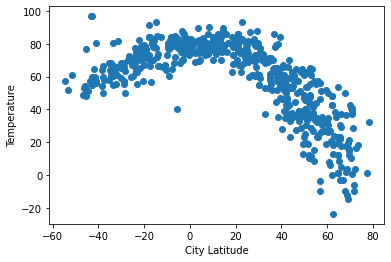

In [11]:
# Latitude vs. Temperature Plot

x_values = weather_data['lat']
y_values = weather_data['temp_max']
plt.scatter(x_values,y_values)
plt.xlabel('City Latitude')
plt.ylabel('Temperature')
plt.show()

In [3]:
# Latitude vs. Humidity Plot

x_values = weather_data['lat']
y_values = weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.show()

NameError: name 'weather_data' is not defined

In [4]:
# Latitude vs. Cloudiness Plot

x_values = weather_data['lat']
y_values = weather_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.show()

NameError: name 'weather_data' is not defined

In [5]:
# Latitude vs. Wind Speed Plot

x_values = weather_data['lat']
y_values = weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.show()

NameError: name 'weather_data' is not defined

In [15]:
# Northern Hemisphere - Max Temp vs. Latitidue Linear Regression

northern_df = weather_data.loc[weather_data['lat'] > 0]

x_values = northern_df['lat']
y_values = northern_df['temp_max']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      20.587079
3      49.637559
5      27.735516
8      63.913188
9      12.057816
         ...    
569    33.991725
572    38.219181
573    38.782133
574    80.132597
576    24.092256
Name: lat, Length: 390, dtype: float64


In [16]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.06x +94.36


The r-value is: 0.71554786500187


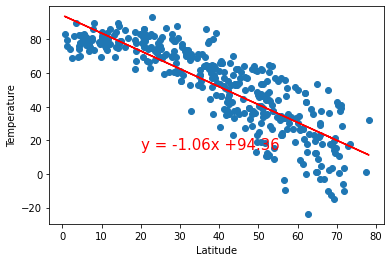

In [17]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [9]:
# Southern Hemisphere - Max Temp vs. Latitidue Linear Regression

In [10]:
# Northern Hemisphere - Humidity(%) vs. Latitidue Linear Regression

In [11]:
# Southern Hemisphere - Humidity(%) vs. Latitidue Linear Regression

In [12]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [13]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [14]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [15]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression